# Convolutional Neural Nets

This type of neural nets are predominantly (and heavily) used in image processing.
https://www.youtube.com/watch?v=BcEapJEKz3M

## Useful terms:

1. Convolution
2. Max pooling
2. Softmax
3. Cross Entropy

## Further Readings:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

mnist = input_data.read_data_sets('./data')

Using TensorFlow backend.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [0]:
x, y = mnist.train.next_batch(20)
num_pixels = x.shape[1]
width = 28
height = 28

In [3]:
!ls -l

total 12
drwxr-xr-x 2 root root 4096 Mar 16 09:26 data
drwxr-xr-x 1 root root 4096 Mar 16 09:19 datalab
drwxr-xr-x 3 root root 4096 Mar 16 09:21 UAT-Colab


In [4]:
x.shape

(20, 784)

In [5]:
28*28

784

In [6]:
y.shape

(20,)

In [7]:
y

array([4, 9, 2, 0, 4, 3, 5, 1, 9, 0, 5, 2, 8, 4, 9, 7, 9, 7, 6, 7],
      dtype=uint8)

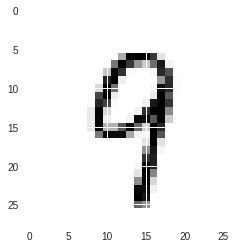

In [8]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

## Basic logistic multiclass classification:

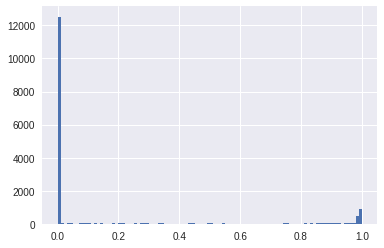

In [9]:
plt.hist(x.ravel(),100)
plt.show()

In [0]:
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(1000)

In [11]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred = logistic.predict(x_test)
y_pred[:10]

array([0, 8, 4, 0, 7, 2, 3, 7, 3, 5], dtype=uint8)

Predicting the probabilities for the first 3 images:

In [13]:
logistic.predict_proba(x_test[:3])

array([[7.76330792e-01, 4.76171404e-07, 1.18946945e-02, 1.90657914e-01,
        8.27353357e-09, 1.92090789e-02, 2.61889083e-04, 1.22210213e-06,
        8.98215801e-04, 7.45708938e-04],
       [1.43206447e-05, 2.96364263e-05, 2.23331563e-06, 7.37249626e-06,
        3.31048038e-01, 2.47741466e-01, 3.11530633e-04, 2.89511019e-05,
        4.18744949e-01, 2.07150210e-03],
       [2.63419922e-04, 2.34205361e-03, 2.76077160e-04, 7.65056949e-04,
        9.13527559e-01, 6.48798212e-04, 1.13996295e-02, 2.18637273e-03,
        1.32514388e-03, 6.72658887e-02]])

Accuracy of the predictions:

In [14]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.877

## Keras Multilayered Perceptron (Neural Net)

In [0]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

### Zero hidden layers

It is important to note that when we do classification problems we use the **Categorical Crossentropy Loss**. When its only two classes we can use Logistic Loss (Binary Crossentropy Loss). Finally for regression problems we use **Mean Squared Error**.

The Cross Entropy loss is defined as:
$$\mathcal{L} = -\frac{1}{N}\sum_i \mathcal{I}(y_i=1)\log(p_{i1})+\mathcal{I}(y_i=2)\log(1-p_{i2})+\cdots++\mathcal{I}(y_i=K)\log(1-p_{iK})$$
where $N$ is the number of training instances, $K$ is the number of classes and $p_{ik}$ is the probability that instance $i$ belongs to $k$.

Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [0]:
model = Sequential()
model.add(Dense(units=10, input_dim=num_pixels, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [17]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s 6ms/step - loss: 0.8342


In [18]:
print("mnist.train.num_examples : ", mnist.train.num_examples)
print("mnist.test  num_examples : ", len(y_test))

mnist.train.num_examples :  55000
mnist.test  num_examples :  1000


In [19]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

array([0, 8, 4, 0, 7, 2, 3, 7, 3, 5])

In [20]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.874

### 1 Hidden Layer

In [0]:
model = Sequential()
model.add(Dense(units=50, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [22]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s 5ms/step - loss: 0.5294


In [23]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

0.919

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [25]:
784*50+50

39250

## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

In [0]:
# Need to reshape the x values to a 28x28 image
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
28*28*32

25088

In [30]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 4s 17ms/step - loss: 0.3881


In [31]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.955

### Using the max pooling layer:

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
14*14*32

6272

In [35]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 3s 13ms/step - loss: 0.4468


In [36]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.937

## Multi Layer Convolutional Network:

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
__________

### Iteratively machine learning: scanning through entire training image set only once: epochs=1

In [39]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 4s 19ms/step - loss: 0.4721


In [40]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.975

### Iteratively machine learning: scanning through entire training image set for 10 times: epochs=10

In [41]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=10)

Epoch 1/10
214/214 [==============================] - 4s 18ms/step - loss: 0.1000
Epoch 2/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0704
Epoch 3/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0550
Epoch 4/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0472
Epoch 5/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0404
Epoch 6/10
 79/214 [==========>...................] - ETA: 2s - loss: 0.0334

214/214 [==============================] - 4s 18ms/step - loss: 0.0328
Epoch 7/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0305
Epoch 8/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0290
Epoch 9/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0256
Epoch 10/10
214/214 [==============================] - 4s 18ms/step - loss: 0.0229


In [42]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.995

---